## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

## Load synthesis files

In [3]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_13_RandomSample/SampleTable_RandomSobol_2025_01_13.csv'] 

In [4]:
fp2name = {'/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_13_RandomSample/SampleTable_RandomSobol_2025_01_13.csv':'Round2Random'
          }



In [48]:
with open('constants_Round2_2025_01_13.json', 'rt') as f:
    constants = json.load(f)

## split apdist and rmse uuids

In [5]:
random_files = ['Round2Random']
apdist_files = []
rmse_files = []

In [6]:
synth_tables = []

random_uuids = []
apdist_uuids = []
rmse_uuids = []

count = 0
for fp in synthesis_files:
    data= pd.read_csv(fp)
    name = fp2name[fp]
    data['campaign'] = [name]*len(data)
    synth_tables.append(data)
    count += len(data)
    if name in random_files:
        random_uuids.extend(list(data['uuid']))
    if name in apdist_files:
        apdist_uuids.extend(list(data['uuid']))
    if name in rmse_files:
        rmse_uuids.extend(list(data['uuid']))
        
    

synth_table = pd.concat(synth_tables, axis = 0)

In [8]:
len(random_uuids)

32

In [9]:
synth_table

,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign
0,0,c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random
1,1,3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random
2,2,0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random
3,3,82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random
4,4,9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random
5,5,d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random
6,6,586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random
7,7,7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random
8,8,d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random
9,9,0c042bd5-e5ed-4460-9bb9-d8556dba293c,429.271862,97.506840,378.830708,794.390591,0.251932,23.847704,0.029060,B3,Round2Random


In [10]:
synth_table = synth_table.drop(['Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well', 'ethanol_dilute_vol', 'sample_dilute_vol'], axis = 1)

KeyError: "['ethanol_dilute_vol', 'sample_dilute_vol'] not found in axis"

In [12]:
synth_table = synth_table.set_index('uuid')

In [13]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign
uuid,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random


## Get volume fractions

In [14]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [15]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [50]:
constants['TEOS']['dilution_ratio']

2.85

In [51]:
# Divide by dilution ratio to get component volume fraction from volume of dilute solution added
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']/constants['TEOS']['dilution_ratio']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']/constants['ammonia']['dilution_ratio']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']/constants['water']['dilution_ratio']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [52]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,1700.0,0.074719,0.008173,0.138075,0.370242,1.506382,0.314632,complete
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,1700.0,0.096565,0.090322,0.030291,0.381045,1.886809,1.358506,complete
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,1700.0,0.031078,0.038559,0.094197,0.533074,1.536987,0.259520,complete
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,1700.0,0.035319,0.061139,0.032709,0.631871,1.533968,0.256223,complete


In [53]:
#synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [54]:
distance_results = pd.read_csv('distance_results_Round2Random.csv')

In [55]:
distance_results = distance_results.set_index('uuid')

In [56]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,raw_rmse_distance,sphere_diameter_nm,sphere_pdi,processes_status
uuid,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,0,0.994091,0.528099,1.522190,0.255116,75.943310,1.000000,success
3ef8b92f-f2eb-4134-ad6c-ae3329408457,1,1.033666,0.514583,1.548249,0.264217,101.152856,0.730457,success
0507cf19-673b-4d6b-922e-c21f718ad4fe,2,0.930899,0.558692,1.489590,0.254219,74.915296,1.000000,success
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,3,0.734126,0.257073,0.991199,0.298204,63.510045,0.136633,success
9964ab9f-5b01-4ae2-b492-a1be55ce083f,4,0.889431,0.539605,1.429035,0.302280,177.793802,0.150685,success
d263a9a8-70c2-49a4-badb-03a72fa16632,5,1.006234,0.500148,1.506382,0.314632,134.978874,0.162232,success
586ae478-4dab-4d7d-9382-ab359a49387a,6,NaN,NaN,NaN,NaN,NaN,NaN,failed
7386215f-7150-48a6-b35f-96cbe5b743cf,7,1.025885,0.511102,1.536987,0.259520,84.355629,1.000000,success
d408858a-bbae-4227-8e64-6c368a1f3398,8,0.969823,0.564145,1.533968,0.256223,74.557883,1.000000,success


In [57]:
distance_list = []
rmse_list = []
experiment_status = []

for uuid_val in synth_table.index:
    print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        rmse_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        rmse_list.append(distance_results['raw_rmse_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        rmse_list.append(row['raw_rmse_distance'])
        experiment_status.append('complete')
        


c563cb4d-d727-437f-9a6a-fef3eccbbe50
3ef8b92f-f2eb-4134-ad6c-ae3329408457
0507cf19-673b-4d6b-922e-c21f718ad4fe
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7
9964ab9f-5b01-4ae2-b492-a1be55ce083f
d263a9a8-70c2-49a4-badb-03a72fa16632
586ae478-4dab-4d7d-9382-ab359a49387a
7386215f-7150-48a6-b35f-96cbe5b743cf
d408858a-bbae-4227-8e64-6c368a1f3398
0c042bd5-e5ed-4460-9bb9-d8556dba293c
8fbd8649-0d61-4edc-9fe3-1ca354becc5a
d4ebf798-d856-406f-9732-f11da412170b
e44ddf37-b7d0-420b-bf6c-02535ca6803a
238ebc43-fbc1-4049-b506-1dc041dedb42
8aacf82b-9869-48dd-ad8a-85eaca6ce824
a635324c-8eea-4566-af05-e39d8101ef91
08f1d123-975c-4dca-b962-6134f27e4ddc
d91aa15e-1296-4485-94d0-0cf924b116de
1537344f-106d-4cb9-b1de-3262334f8665
7c2bc3ea-ff76-42ba-88f9-86fb14a0f437
1ec7142f-1f4f-44ee-965b-da3a052e0b2a
13735048-3ac7-447e-8bca-7af4fda689cb
f041b533-6c1d-4be3-aa7b-01521b804bf8
1c5c16fb-5f52-451d-a370-36a6418ab246
0a4b4bec-376d-4106-853e-53c50b36e515
ee885bbe-4e05-426d-9772-0e1e3293e727
da675871-7139-4a31-8e76-317fb87385fa
9

In [58]:
synth_table['ap_distance'] = distance_list
synth_table['rmse_distance'] = rmse_list
synth_table['experiment_status'] = experiment_status

In [59]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,1700.0,0.074719,0.008173,0.138075,0.370242,1.506382,0.314632,complete
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,1700.0,0.096565,0.090322,0.030291,0.381045,1.886809,1.358506,complete
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,1700.0,0.031078,0.038559,0.094197,0.533074,1.536987,0.259520,complete
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,1700.0,0.035319,0.061139,0.032709,0.631871,1.533968,0.256223,complete


## Split out RMSE and APDist results

In [60]:
apdist_samples = random_uuids.copy()
apdist_samples.extend(apdist_uuids)

rmse_samples = random_uuids.copy()
rmse_samples.extend(rmse_uuids)

In [61]:
len(rmse_samples)

32

In [62]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,1700.0,0.074719,0.008173,0.138075,0.370242,1.506382,0.314632,complete
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,1700.0,0.096565,0.090322,0.030291,0.381045,1.886809,1.358506,complete
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,1700.0,0.031078,0.038559,0.094197,0.533074,1.536987,0.259520,complete
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,1700.0,0.035319,0.061139,0.032709,0.631871,1.533968,0.256223,complete


In [63]:
rmse_samples

['c563cb4d-d727-437f-9a6a-fef3eccbbe50',
 '3ef8b92f-f2eb-4134-ad6c-ae3329408457',
 '0507cf19-673b-4d6b-922e-c21f718ad4fe',
 '82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7',
 '9964ab9f-5b01-4ae2-b492-a1be55ce083f',
 'd263a9a8-70c2-49a4-badb-03a72fa16632',
 '586ae478-4dab-4d7d-9382-ab359a49387a',
 '7386215f-7150-48a6-b35f-96cbe5b743cf',
 'd408858a-bbae-4227-8e64-6c368a1f3398',
 '0c042bd5-e5ed-4460-9bb9-d8556dba293c',
 '8fbd8649-0d61-4edc-9fe3-1ca354becc5a',
 'd4ebf798-d856-406f-9732-f11da412170b',
 'e44ddf37-b7d0-420b-bf6c-02535ca6803a',
 '238ebc43-fbc1-4049-b506-1dc041dedb42',
 '8aacf82b-9869-48dd-ad8a-85eaca6ce824',
 'a635324c-8eea-4566-af05-e39d8101ef91',
 '08f1d123-975c-4dca-b962-6134f27e4ddc',
 'd91aa15e-1296-4485-94d0-0cf924b116de',
 '1537344f-106d-4cb9-b1de-3262334f8665',
 '7c2bc3ea-ff76-42ba-88f9-86fb14a0f437',
 '1ec7142f-1f4f-44ee-965b-da3a052e0b2a',
 '13735048-3ac7-447e-8bca-7af4fda689cb',
 'f041b533-6c1d-4be3-aa7b-01521b804bf8',
 '1c5c16fb-5f52-451d-a370-36a6418ab246',
 '0a4b4bec-376d-

In [64]:
'0ec1c475-cfcb-4825-99d1-8aa99d749a94' == '0ec1c475-cfcb-4825-99d1-8aa99d749a94'

True

In [65]:
synth_table_apdist = synth_table.loc[apdist_samples]
synth_table_rmse = synth_table.loc[rmse_samples]

In [66]:
synth_table_apdist = synth_table_apdist[synth_table_apdist['experiment_status'] == 'complete'].copy()
synth_table_rmse = synth_table_rmse[synth_table_rmse['experiment_status'] == 'complete'].copy()

In [67]:
synth_table_apdist['rank'] = synth_table_apdist['ap_distance'].rank()
synth_table_rmse['rank'] = synth_table_rmse['ap_distance'].rank()

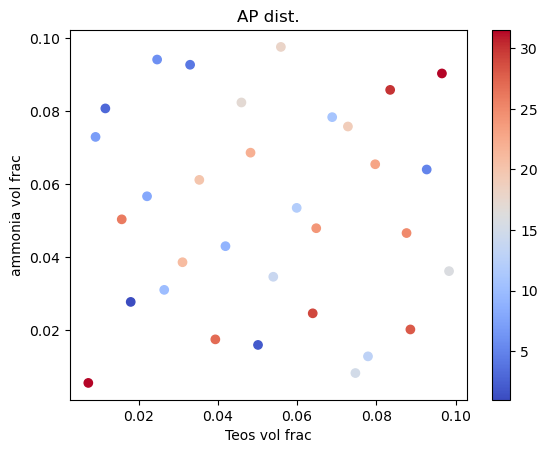

In [68]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_apdist['teos_vol_frac'], synth_table_apdist['ammonia_vol_frac'], c = synth_table_apdist['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('AP dist.')
cbar = fig.colorbar(sc, ax = ax)

In [72]:
synth_table['teos_vol_frac'].max()

0.09836054170504212

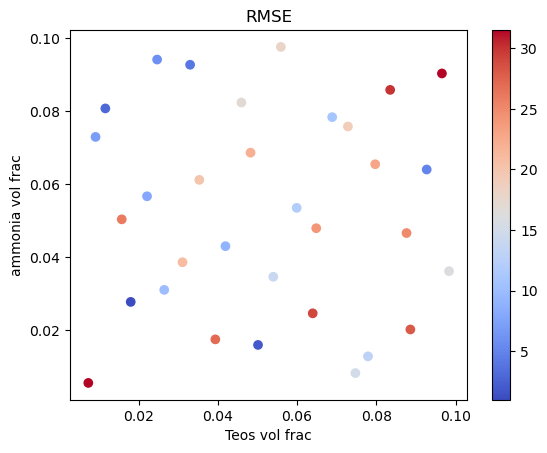

In [69]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_rmse['teos_vol_frac'], synth_table_rmse['ammonia_vol_frac'], c = synth_table_rmse['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('RMSE')
cbar = fig.colorbar(sc, ax = ax)

In [73]:

name_bounds_apdist = {}
for name in fp2name.values():
    name_bounds_apdist[name] = []
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_apdist[name].append(count)
        count += 1
        

In [74]:
best_distances_ap = []
for i, row in synth_table_apdist.iterrows():
    dist = row['ap_distance']
    if len(best_distances_ap) == 0:
        best_distances_ap.append(dist)
    else:
        best_distances_ap.append(min(best_distances_ap[-1], dist))

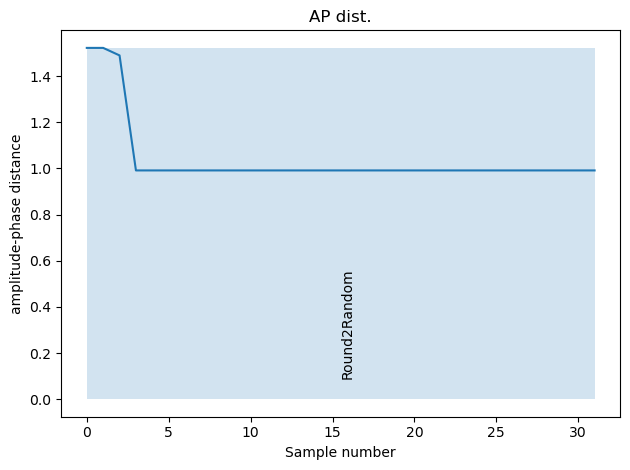

In [75]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_apdist.items():
    ax.fill_between(bounds, 0, max(best_distances_ap), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances_ap)


ax.set_xlabel('Sample number')
ax.set_ylabel('amplitude-phase distance')
ax.set_title('AP dist.')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [76]:
# rmse
name_bounds_rmse = {}
for name in fp2name.values():
    name_bounds_rmse[name] = []
    count = 0
    for i, row in synth_table_rmse.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_rmse[name].append(count)
        count += 1

In [77]:
best_distances_rmse = []
for i, row in synth_table_rmse.iterrows():
    dist = row['ap_distance']
    if len(best_distances_rmse) == 0:
        best_distances_rmse.append(dist)
    else:
        best_distances_rmse.append(min(best_distances_rmse[-1], dist))

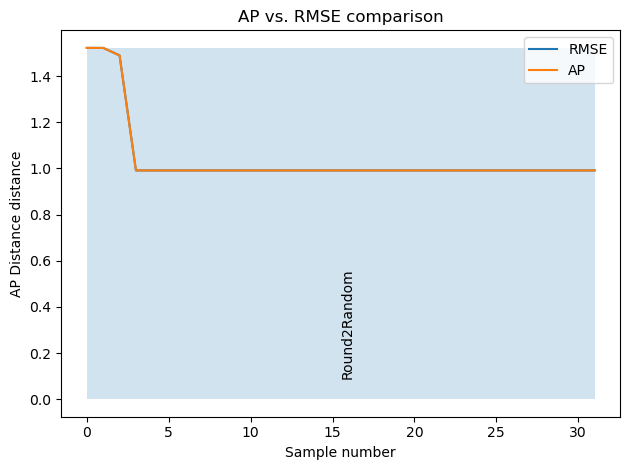

In [78]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_rmse.items():
    ax.fill_between(bounds, 0, max(best_distances_rmse), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances_rmse, label = 'RMSE')
ax.plot(best_distances_ap, label = 'AP')

ax.legend(loc = 'upper right')


ax.set_xlabel('Sample number')
ax.set_ylabel('AP Distance distance')
ax.set_title('AP vs. RMSE comparison')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [79]:
b

NameError: name 'b' is not defined

In [80]:
synth_table_rmse[synth_table_rmse['rmse_distance'] == synth_table_rmse['rmse_distance'].min()]

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,
d91aa15e-1296-4485-94d0-0cf924b116de,377.418571,61.77062,187.661303,1073.149507,0.286545,20.967054,0.025885,C4,Round2Random,1700.0,0.077899,0.012749,0.038733,0.631264,1.491098,0.227101,complete,13.0


In [81]:
synth_table_rmse

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete,17.0
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete,25.0
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete,12.0
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete,1.0
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete,7.0
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,1700.0,0.074719,0.008173,0.138075,0.370242,1.506382,0.314632,complete,15.0
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,1700.0,0.096565,0.090322,0.030291,0.381045,1.886809,1.358506,complete,31.5
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,1700.0,0.031078,0.038559,0.094197,0.533074,1.536987,0.259520,complete,21.0
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,1700.0,0.035319,0.061139,0.032709,0.631871,1.533968,0.256223,complete,20.0


In [82]:
## best for campaign plot

name_distances_apdist = {}
for name in fp2name.values():
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            try:
               name_distances_apdist[name].append(row['ap_distance'])
            except KeyError:
                name_distances_apdist[name] = [row['ap_distance']]
        count += 1

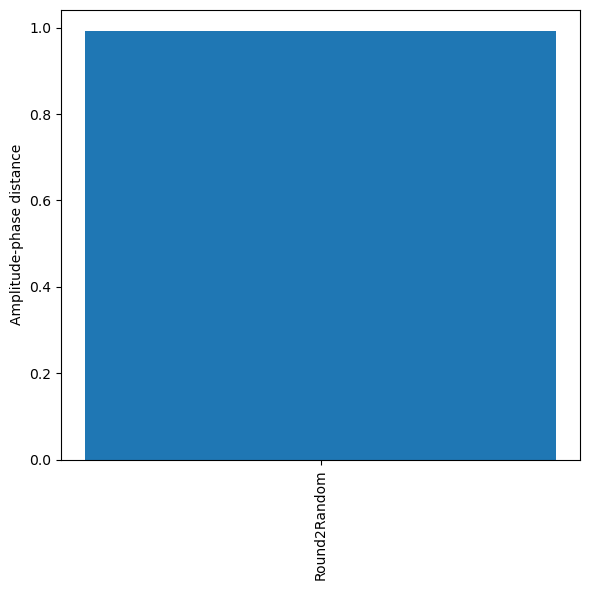

In [83]:
fig, ax = plt.subplots(figsize = (6,6))
name_distances_max = [min(distances) for distances in name_distances_apdist.values()]
ax.bar(name_distances_apdist.keys(), name_distances_max)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()

plt.savefig('best_per_campaign.png', dpi = 300)

In [84]:
synth_table_apdist.to_csv('synth_table_Round2Random.csv')
#synth_table_rmse.to_csv('synth_table_12_18_24_rmse.csv')